In [3]:
import pandas as pd

In [4]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [5]:
df=pd.read_csv("train.csv")

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
import matplotlib as plt

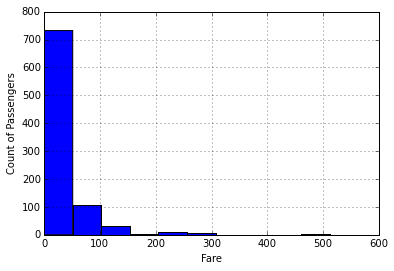

In [8]:
df.Fare.hist(bins=10)
plt.pyplot.xlabel('Fare')
plt.pyplot.ylabel('Count of Passengers')

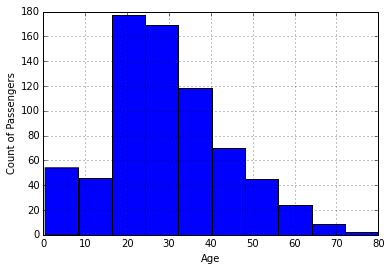

In [9]:
df.Age.hist(bins=10)
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Count of Passengers')

In [10]:
df[df.PassengerId.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
df.Survived.value_counts()

0    549
1    342
dtype: int64

In [12]:
df[df.Survived.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
import pandas as pd

In [14]:
df=pd.read_csv("train.csv")

In [1163]:
X = pd.DataFrame()
X['sex']=df['Sex']
X['age']=df['Age']
X['parch']=df['Parch']
X['pclass']=df['Pclass']
X['sibsp']=df['SibSp']
X['survived']=df['Survived']

In [1164]:
X=X.dropna(axis=0)

In [1165]:
y= X['survived']
X= X.drop(['survived'],axis=1)

In [1166]:
pd.get_dummies(X.sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [1167]:
X['sex']=pd.get_dummies(X.sex)['male']

In [1168]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

In [1169]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=94)

In [1170]:
from sklearn.metrics import accuracy_score

In [1171]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [1172]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [1173]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.90


In [1174]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [1175]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )

Logistic AUC = 0.90
             precision    recall  f1-score   support

          0       0.94      0.89      0.92        94
          1       0.81      0.90      0.85        49

avg / total       0.90      0.90      0.90       143



In [1176]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

In [1177]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


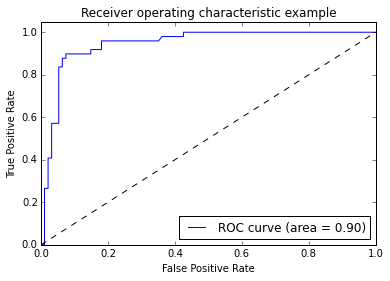

In [1178]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()